# Coursera IBM Capstone Module ML

This notebook will be used for the Capstone Module of IBM's ML course. 

In [28]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
print("Hello Capstone Project Course")

Hello Capstone Project Course


In [66]:
Data = pd.read_excel("Data-Collisions.xlsx")

In [67]:
Data.head()

,OBJECTID,ADDRTYPE,SEVERITY,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR
0,1,Intersection,1,Injury Collision,Angles,2,0,0,2,2013-03-27 01:00:00,3/27/2013 2:54:00 PM,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,0.0,Overcast,Wet,Daylight,0,0
1,2,Block,0,Property Damage Only Collision,Sideswipe,2,0,0,2,2006-12-20 01:00:00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",0,0.0,Raining,Wet,Dark - Street Lights On,0,0
2,3,Block,0,Property Damage Only Collision,Parked Car,4,0,0,3,2004-11-18 01:00:00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",0,0.0,Overcast,Dry,Daylight,0,0
3,4,Block,0,Property Damage Only Collision,Other,3,0,0,3,2013-03-29 01:00:00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,0.0,Clear,Dry,Daylight,0,0
4,5,Intersection,1,Injury Collision,Angles,2,0,0,2,2004-01-28 01:00:00,1/28/2004 8:04:00 AM,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,0.0,Raining,Wet,Daylight,0,0


In [68]:
Data["INCDTTM"]=pd.to_datetime(Data["INCDTTM"])
Data.head()

,OBJECTID,ADDRTYPE,SEVERITY,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR
0,1,Intersection,1,Injury Collision,Angles,2,0,0,2,2013-03-27 01:00:00,2013-03-27 14:54:00,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,0.0,Overcast,Wet,Daylight,0,0
1,2,Block,0,Property Damage Only Collision,Sideswipe,2,0,0,2,2006-12-20 01:00:00,2006-12-20 18:55:00,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",0,0.0,Raining,Wet,Dark - Street Lights On,0,0
2,3,Block,0,Property Damage Only Collision,Parked Car,4,0,0,3,2004-11-18 01:00:00,2004-11-18 10:20:00,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",0,0.0,Overcast,Dry,Daylight,0,0
3,4,Block,0,Property Damage Only Collision,Other,3,0,0,3,2013-03-29 01:00:00,2013-03-29 09:26:00,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,0.0,Clear,Dry,Daylight,0,0
4,5,Intersection,1,Injury Collision,Angles,2,0,0,2,2004-01-28 01:00:00,2004-01-28 08:04:00,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,0.0,Raining,Wet,Daylight,0,0


In [162]:
Data.corr().to_excel("tabla.xlsx")

In [35]:
Data.isnull().sum()

OBJECTID              0
ADDRTYPE           1926
SEVERITY              0
SEVERITYDESC          0
COLLISIONTYPE      4904
PERSONCOUNT           0
PEDCOUNT              0
PEDCYLCOUNT           0
VEHCOUNT              0
INCDATE               0
INCDTTM               0
JUNCTIONTYPE       6338
SDOT_COLDESC          0
INATTENTIONIND        0
UNDERINFL          4884
WEATHER           20172
ROADCOND          20090
LIGHTCOND         18643
SPEEDING              0
HITPARKEDCAR          0
dtype: int64

In [75]:
Data = Data.dropna()
Data.shape

(167840, 22)

In [37]:
High = Data[Data["SEVERITY"]==1]
High.shape

(55473, 20)

In [95]:
Data["INCDATE"]=pd.to_datetime(Data["INCDATE"])
Data["DAYWEEK"]=Data["INCDATE"].dt.dayofweek
Data["INCDTTM"]=pd.to_datetime(Data["INCDTTM"])
Data["HOUR"]=Data["INCDTTM"].dt.hour
Data["DAY"]=Data["INCDTTM"].dt.day
Data.head()

,OBJECTID,ADDRTYPE,SEVERITY,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,...,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR,DAYWEEK,HOUR,MONTH,DAY
0,1,Intersection,1,Injury Collision,Angles,2,0,0,2,2013-03-27 01:00:00,...,0.0,Overcast,Wet,Daylight,0,0,2,14,3,27
1,2,Block,0,Property Damage Only Collision,Sideswipe,2,0,0,2,2006-12-20 01:00:00,...,0.0,Raining,Wet,Dark - Street Lights On,0,0,2,18,12,20
2,3,Block,0,Property Damage Only Collision,Parked Car,4,0,0,3,2004-11-18 01:00:00,...,0.0,Overcast,Dry,Daylight,0,0,3,10,11,18
3,4,Block,0,Property Damage Only Collision,Other,3,0,0,3,2013-03-29 01:00:00,...,0.0,Clear,Dry,Daylight,0,0,4,9,3,29
4,5,Intersection,1,Injury Collision,Angles,2,0,0,2,2004-01-28 01:00:00,...,0.0,Raining,Wet,Daylight,0,0,2,8,1,28


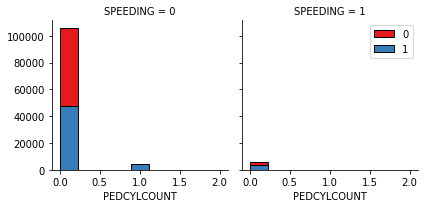

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt
bins=np.linspace(Data.PEDCYLCOUNT.min(), Data.PEDCYLCOUNT.max(), 10)
g = sns.FacetGrid(Data,col="SPEEDING", hue="SEVERITY", palette="Set1", col_wrap=2)
g.map(plt.hist, 'PEDCYLCOUNT', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

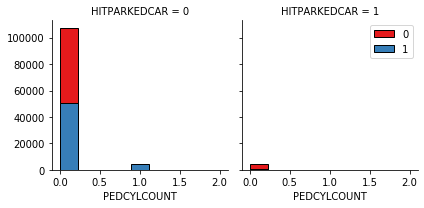

In [173]:
bins=np.linspace(Data.PEDCYLCOUNT.min(), Data.PEDCYLCOUNT.max(), 10)
g = sns.FacetGrid(Data,col="HITPARKEDCAR", hue="SEVERITY", palette="Set1", col_wrap=2)
g.map(plt.hist, 'PEDCYLCOUNT', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

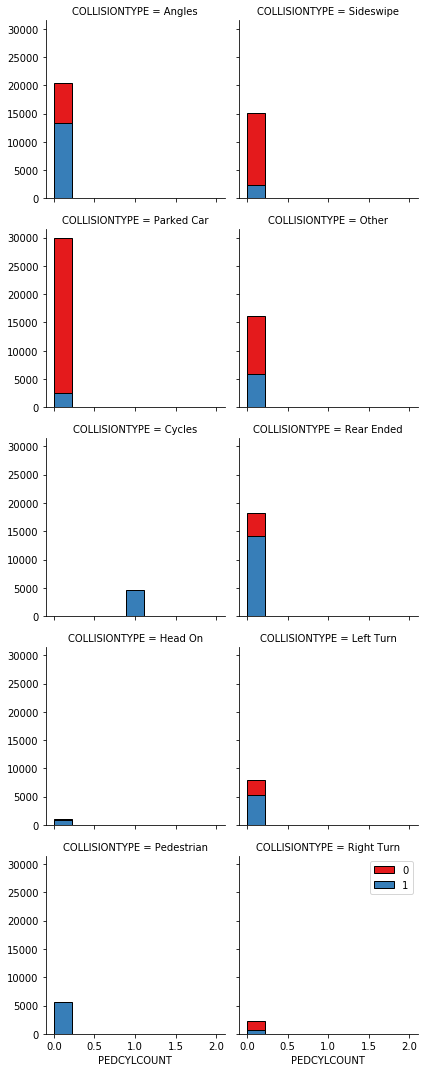

In [176]:
bins=np.linspace(Data.PEDCYLCOUNT.min(), Data.PEDCYLCOUNT.max(), 10)
g = sns.FacetGrid(Data,col="COLLISIONTYPE", hue="SEVERITY", palette="Set1", col_wrap=2)
g.map(plt.hist, 'PEDCYLCOUNT', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [ ]:
bins=np.linspace(Data.PEDCYLCOUNT.min(), Data.PEDCYLCOUNT.max(), 10)
g = sns.FacetGrid(Data,col="ADDRTYPE", hue="SEVERITY", palette="Set1", col_wrap=2)
g.map(plt.hist, 'PEDCYLCOUNT', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

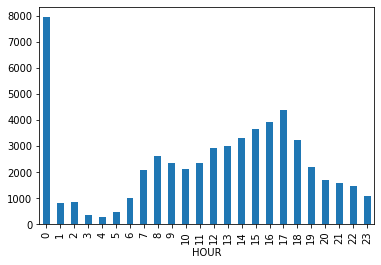

In [170]:
Data[Data["SEVERITY"] == True].groupby("HOUR").count()["OBJECTID"].plot(kind = "bar")

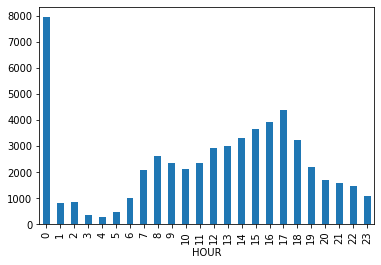

In [166]:
Data[Data["SEVERITY"]==1].groupby("HOUR").count()["OBJECTID"].plot(kind = "bar")

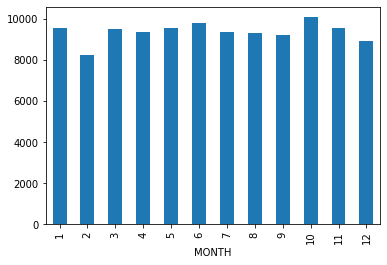

In [153]:
Data[Data["SEVERITY"]==0].groupby("MONTH").count()["OBJECTID"].plot(kind = "bar")

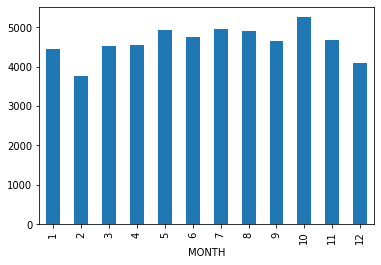

In [154]:
Data[Data["SEVERITY"]==1].groupby("MONTH").count()["OBJECTID"].plot(kind = "bar")

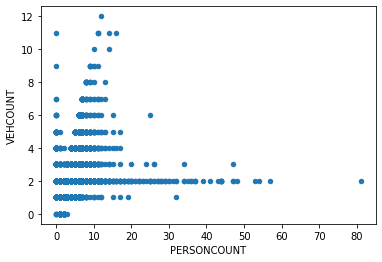

In [157]:
Data[["PERSONCOUNT", "VEHCOUNT"]].plot(kind = "scatter", y = "VEHCOUNT", x = "PERSONCOUNT")

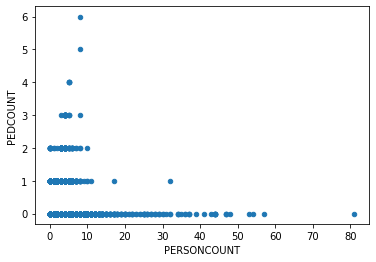

In [159]:
Data[["PERSONCOUNT", "PEDCOUNT"]].plot(kind = "scatter", y = "PEDCOUNT", x = "PERSONCOUNT")

In [161]:
Data[["PERSONCOUNT", "PEDCOUNT", "UNDERINFL", "HITPARKEDCAR", "HOUR"]].corr()

,PERSONCOUNT,PEDCOUNT,UNDERINFL,HITPARKEDCAR,HOUR
PERSONCOUNT,1.000000,-0.030999,0.013289,-0.039348,0.028616
PEDCOUNT,-0.030999,1.000000,0.012178,-0.030581,0.026565
UNDERINFL,0.013289,0.012178,1.000000,0.028033,-0.033973
HITPARKEDCAR,-0.039348,-0.030581,0.028033,1.000000,0.032027
HOUR,0.028616,0.026565,-0.033973,0.032027,1.000000


In [84]:
columns= ["PERSONCOUNT", "PEDCOUNT", "UNDERINFL", "HITPARKEDCAR", "HOUR"]
y= Data["SEVERITY"]
x_prev = Data[columns]
x_prev = pd.concat([x_prev,pd.get_dummies(Data["ADDRTYPE"])], axis=1)
x_prev = pd.concat([x_prev,pd.get_dummies(Data["JUNCTIONTYPE"])], axis=1)
X = pd.concat([x_prev,pd.get_dummies(Data[ "COLLISIONTYPE"])], axis=1)
X.head()

,PERSONCOUNT,PEDCOUNT,UNDERINFL,HITPARKEDCAR,HOUR,Alley,Block,Intersection,At Intersection (but not related to intersection),At Intersection (intersection related),...,Angles,Cycles,Head On,Left Turn,Other,Parked Car,Pedestrian,Rear Ended,Right Turn,Sideswipe
0,2,0,0.0,0,14,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
1,2,0,0.0,0,18,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,4,0,0.0,0,10,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,3,0,0.0,0,9,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,2,0,0.0,0,8,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0


In [85]:
from imblearn.under_sampling import NearMiss
nm = NearMiss(random_state=42)
X,y=nm.fit_sample(X,y)
X = preprocessing.StandardScaler().fit(X).transform(X)
X.shape

(110946, 24)

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# KNN

In [101]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k = 17 
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
yhat=kNN_model.predict(X_test)
metrics.accuracy_score(y_test, yhat)

0.7045065344749888

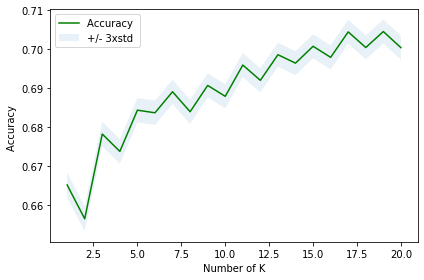

In [100]:
from sklearn import metrics
Ks = 21
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of K')
plt.tight_layout()
plt.show()

In [98]:
knn_yhat = kNN_model.predict(X_test)
print("KNN Jaccard index: %.2f" % jaccard_similarity_score(y_test, knn_yhat))
print("KNN F1-score: %.2f" % f1_score(y_test, knn_yhat, average='weighted') )

KNN Jaccard index: 0.70
KNN F1-score: 0.70


C:\Users\loren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


# SVM

In [107]:
from sklearn import svm
SVM_model = svm.SVC()
SVM_model.fit(X_train, y_train)

C:\Users\loren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [177]:
SVM_ypred = SVM_model.predict(X_test)
print("Jaccard index: %.2f" % jaccard_similarity_score(y_test, SVM_ypred))
print("DT F1-score: %.2f" % f1_score(y_test, SVM_ypred, average='weighted') )
print("Accuracy Score %.2f" % metrics.accuracy_score(y_test, SVM_ypred))

Jaccard index: 0.71
DT F1-score: 0.71
Accuracy Score 0.71


C:\Users\loren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


# DECISION TREE

In [178]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DT_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [179]:
DT_yhat = DT_model.predict(X_test)
print("DT Jaccard index: %.2f" % jaccard_similarity_score(y_test, DT_yhat))
print("DT F1-score: %.2f" % f1_score(y_test, DT_yhat, average='weighted') )
print("LR Accuracy Score: %.2f" % metrics.accuracy_score(y_test, LR_yhat))

DT Jaccard index: 0.66
DT F1-score: 0.64
LR Accuracy Score: 0.70


C:\Users\loren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


# LR

In [105]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C=0.01, solver = "saga").fit(X_train,y_train)

In [106]:
LR_yhat = LR_model.predict(X_test)
LR_yhat_prob = LR_model.predict_proba(X_test)
print("LR Accuracy Score: %.2f" % metrics.accuracy_score(y_test, LR_yhat))
print("LR Jaccard index: %.2f" % jaccard_similarity_score(y_test, LR_yhat))
print("LR F1-score: %.2f" % f1_score(y_test, LR_yhat, average='weighted') )
print("LR LogLoss: %.2f" % log_loss(y_test, LR_yhat_prob))

LR Accuracy Score: 0.70
LR Jaccard index: 0.70
LR F1-score: 0.70
LR LogLoss: 0.55


C:\Users\loren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
